# walmart

In [9]:
import sys

In [10]:
# imoports
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

In [11]:
# constants

FEATURES_DATA_FILE = '/content/features.csv'
STORES_DATA_FILE = '/content/stores.csv'
TRAIN_DATA_FILE = '/content/train.csv'

## Load the data

In [12]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [13]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

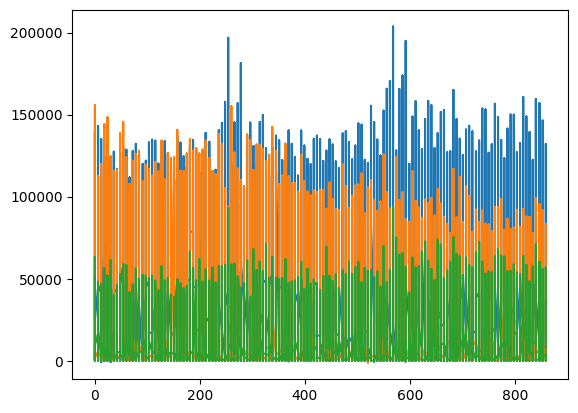

In [14]:
view_df = train_original_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
view_df["DN"] = view_df["DN"] - view_df["DN"].min()

view_df = view_df.sort_values(by=["DN"])

for store in view_df["Store"].sort_values().unique():
    if int(store) in [1, 3, 5]:
        x = view_df[view_df["Store"] == store]["DN"]
        y = view_df[view_df["Store"] == store]["Weekly_Sales"]
        plt.plot(x, y)



In [15]:
df = train_original_df.copy()

In [16]:
SINGLE_STORE = False

if SINGLE_STORE:
    df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [17]:
features_df.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [18]:
store_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [19]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [20]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
original_df = df.copy()

### why we removing features with missing values

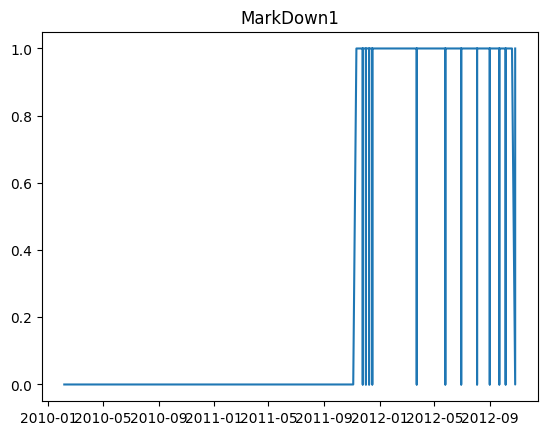

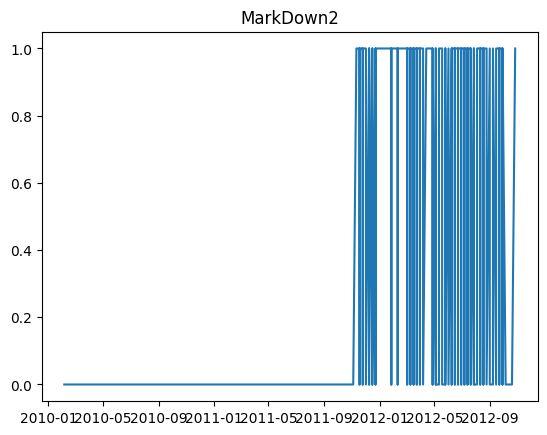

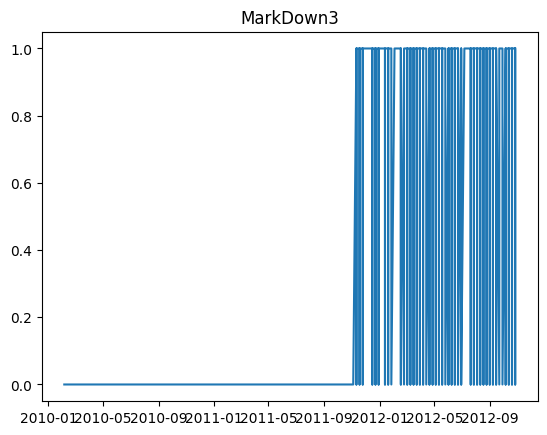

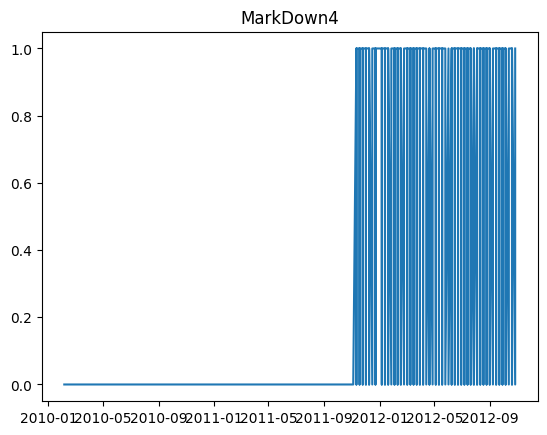

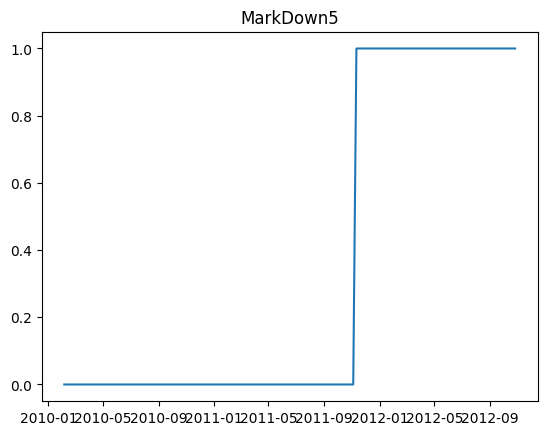

In [21]:
x = df.sort_values(by=["Date"])["Date"]


for column in df.columns:
    if df[column].isna().sum() > 0:
        plt.title(column)
        plt.plot(x, df.sort_values(by=["Date"])[column].isna().astype(int) * -1 + 1)
        plt.show()


As you can see, the MarkDown columns have lots of missing values in hafe of the weeks of the data

In [22]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0           1     1 2010-02-05      24924.50        False    A  151315   
1           1     2 2010-02-05      50605.27        False    A  151315   
2           1     3 2010-02-05      13740.12        False    A  151315   
3           1     4 2010-02-05      39954.04        False    A  151315   
4           1     5 2010-02-05      32229.38        False    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421565     45    93 2012-10-26       2487.80        False    B  118221   
421566     45    94 2012-10-26       5203.31        False    B  118221   
421567     45    95 2012-10-26      56017.47        False    B  118221   
421568     45    97 2012-10-26       6817.48        False    B  118221   
421569     45    98 2012-10-26       1076.80        False    B  118221   

        Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0             42.31       2.572  211.096358         8.106        False  
1             42.31       2.572  211.096358         8.106        False  
2             42.31       2.572  211.096358         8.106        False  
3             42.31       2.572  211.096358         8.106        False  
4             42.31       2.572  211.096358         8.106        False  
...             ...         ...         ...           ...          ...  
421565        58.85       3.882  192.308899         8.667        False  
421566        58.85       3.882  192.308899         8.667        False  
421567        58.85       3.882  192.308899         8.667        False  
421568        58.85       3.882  192.308899         8.667        False  
421569        58.85       3.882  192.308899         8.667        False  

[421570 rows x 12 columns]

## First Describe of the data

In [23]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     2 2010-02-05      50605.27        False    A  151315   
2      1     3 2010-02-05      13740.12        False    A  151315   
3      1     4 2010-02-05      39954.04        False    A  151315   
4      1     5 2010-02-05      32229.38        False    A  151315   

   Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0        42.31       2.572  211.096358         8.106        False  
1        42.31       2.572  211.096358         8.106        False  
2        42.31       2.572  211.096358         8.106        False  
3        42.31       2.572  211.096358         8.106        False  
4        42.31       2.572  211.096358         8.106        False

In [24]:
df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price            CPI   Unemployment  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean       60.090059       3.361027     171.201947       7.960289  
std        18.447931       0.458515      39.159276       1.863296  
min        -2.060000       2.472000     126.064000       3.879000  
25%        46.680000       2.933000     132.022667       6.891000  
50%        62.090000       3.452000     182.318780       7.866000  
75%        74.280000       3.738000     212.416993       8.572000  
max       100.140000       4.468000     227.232807      14.313000

In [25]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [26]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [27]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [28]:
df

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
0           1     1 2010-02-05      24924.50        42.31       2.572   
1           1     2 2010-02-05      50605.27        42.31       2.572   
2           1     3 2010-02-05      13740.12        42.31       2.572   
3           1     4 2010-02-05      39954.04        42.31       2.572   
4           1     5 2010-02-05      32229.38        42.31       2.572   
...       ...   ...        ...           ...          ...         ...   
421565     45    93 2012-10-26       2487.80        58.85       3.882   
421566     45    94 2012-10-26       5203.31        58.85       3.882   
421567     45    95 2012-10-26      56017.47        58.85       3.882   
421568     45    97 2012-10-26       6817.48        58.85       3.882   
421569     45    98 2012-10-26       1076.80        58.85       3.882   

               CPI  Unemployment  IsHoliday  Store-Type  Store-Size  
0       211.096358         8.106      False           1      151315  
1       211.096358         8.106      False           1      151315  
2       211.096358         8.106      False           1      151315  
3       211.096358         8.106      False           1      151315  
4       211.096358         8.106      False           1      151315  
...            ...           ...        ...         ...         ...  
421565  192.308899         8.667      False           2      118221  
421566  192.308899         8.667      False           2      118221  
421567  192.308899         8.667      False           2      118221  
421568  192.308899         8.667      False           2      118221  
421569  192.308899         8.667      False           2      118221  

[421570 rows x 11 columns]

In [29]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [30]:
for i in range(1, 5):
    df["Weekly-Sales-last-" + str(i) + "-weeks"] = df["Weekly_Sales"].shift(i)

for i in range(1, 4):
    df["Weekly-Diff-last-" + str(i) + "-weeks"] = df["Weekly-Sales-last-" + str(i) + "-weeks"] - df["Weekly-Sales-last-" + str(i+1) + "-weeks"]

df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(6).index)

In [31]:
for i in range(4):
    df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(i+1)].index)

In [32]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [33]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [34]:
df = df.drop(columns=["Store-Dept"])

In [35]:
df = df.drop(columns=["Weekly_Sales"])

In [36]:
df

Store  Dept       Date  Temperature  Fuel_Price         CPI  \
index-2                                                                
1155         1     1 2010-05-28        80.44       2.759  210.896761   
1225         1     1 2010-06-04        80.69       2.705  211.176428   
1296         1     1 2010-06-11        80.43       2.668  211.456095   
1367         1     1 2010-06-18        84.11       2.637  211.453772   
1436         1     1 2010-06-25        84.34       2.653  211.338653   
...        ...   ...        ...          ...         ...         ...   
87523        9    96 2012-10-26        69.52       3.506  227.232807   
84767        9    98 2011-12-23        44.43       3.112  223.066113   
84895        9    98 2012-01-06        47.54       3.157  223.433241   
85083        9    98 2012-01-27        49.38       3.290  223.806053   
86086        9    98 2012-05-18        69.52       3.630  225.494250   

         Unemployment  IsHoliday  Store-Type  Store-Size  \
index-2                                                    
1155            7.808          0           1      151315   
1225            7.808          0           1      151315   
1296            7.808          0           1      151315   
1367            7.808          0           1      151315   
1436            7.808          0           1      151315   
...               ...        ...         ...         ...   
87523           4.954          0           2      125833   
84767           6.054          0           2      125833   
84895           5.667          0           2      125833   
85083           5.667          0           2      125833   
86086           5.539          0           2      125833   

         Weekly-Sales-last-1-weeks  Weekly-Sales-last-2-weeks  \
index-2                                                         
1155                      14773.04                   18926.74   
1225                      15580.43                   14773.04   
1296                      17558.09                   15580.43   
1367                      16637.62                   17558.09   
1436                      16216.27                   16637.62   
...                            ...                        ...   
87523                      3540.05                    3675.99   
84767                        66.75                      75.77   
84895                        25.50                      66.75   
85083                         0.50                      25.50   
86086                        -1.00                       0.50   

         Weekly-Sales-last-3-weeks  Weekly-Sales-last-4-weeks  \
index-2                                                         
1155                      17413.94                   16555.11   
1225                      18926.74                   17413.94   
1296                      14773.04                   18926.74   
1367                      15580.43                   14773.04   
1436                      17558.09                   15580.43   
...                            ...                        ...   
87523                      4306.43                    3763.21   
84767                        54.75                      60.75   
84895                        75.77                      54.75   
85083                        66.75                      75.77   
86086                        25.50                      66.75   

         Weekly-Diff-last-1-weeks  Weekly-Diff-last-2-weeks  \
index-2                                                       
1155                     -4153.70                   1512.80   
1225                       807.39                  -4153.70   
1296                      1977.66                    807.39   
1367                      -920.47                   1977.66   
1436                      -421.35                   -920.47   
...                           ...                       ...   
87523                     -135.94                   -630.44   
84767                       -9.0

# split to train and test

In [37]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = df[df["Date"] > limit_date].copy()
df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [38]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [39]:
df["Date"].sort_values().unique()

array(['2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13T00:00:00.000000000',
       '2010-08-20T00:00:00.000000000', '2010-08-27T00:00:00.000000000',
       '2010-09-03T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-09-17T00:00:00.000000000', '2010-09-24T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-10-08T00:00:00.000000000',
       '2010-10-15T00:00:00.000000000', '2010-10-22

In [40]:
train_df["Date"].sort_values().unique()

array(['2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13T00:00:00.000000000',
       '2010-08-20T00:00:00.000000000', '2010-08-27T00:00:00.000000000',
       '2010-09-03T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-09-17T00:00:00.000000000', '2010-09-24T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-10-08T00:00:00.000000000',
       '2010-10-15T00:00:00.000000000', '2010-10-22

In [41]:
test_df["Date"].sort_values().unique()

array(['2011-12-09T00:00:00.000000000', '2011-12-16T00:00:00.000000000',
       '2011-12-23T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-01-06T00:00:00.000000000', '2012-01-13T00:00:00.000000000',
       '2012-01-20T00:00:00.000000000', '2012-01-27T00:00:00.000000000',
       '2012-02-03T00:00:00.000000000', '2012-02-10T00:00:00.000000000',
       '2012-02-17T00:00:00.000000000', '2012-02-24T00:00:00.000000000',
       '2012-03-02T00:00:00.000000000', '2012-03-09T00:00:00.000000000',
       '2012-03-16T00:00:00.000000000', '2012-03-23T00:00:00.000000000',
       '2012-03-30T00:00:00.000000000', '2012-04-06T00:00:00.000000000',
       '2012-04-13T00:00:00.000000000', '2012-04-20T00:00:00.000000000',
       '2012-04-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [42]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [43]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [44]:
train_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0      0      1     1 2010-05-28        80.44       2.759  210.896761   
1      1      1     1 2010-06-04        80.69       2.705  211.176428   
2      2      1     1 2010-06-11        80.43       2.668  211.456095   
3      3      1     1 2010-06-18        84.11       2.637  211.453772   
4      4      1     1 2010-06-25        84.34       2.653  211.338653   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.808          0           1    0.233352                   14773.04   
1         7.808          0           1    0.233352                   15580.43   
2         7.808          0           1    0.233352                   17558.09   
3         7.808          0           1    0.233352                   16637.62   
4         7.808          0           1    0.233352                   16216.27   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   18926.74                   17413.94   
1                   14773.04                   18926.74   
2                   15580.43                   14773.04   
3                   17558.09                   15580.43   
4                   16637.62                   17558.09   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   16555.11                  -4153.70   
1                   17413.94                    807.39   
2                   18926.74                   1977.66   
3                   14773.04                   -920.47   
4                   15580.43                   -421.35   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1512.80                    858.83       807.39  
1                  -4153.70                   1512.80      1977.66  
2                    807.39                  -4153.70      -920.47  
3                   1977.66                    807.39      -421.35  
4                   -920.47                   1977.66       112.45

In [45]:
test_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0     80      1     1 2011-12-09        43.93       3.158  218.961846   
1     81      1     1 2011-12-16        51.63       3.159  219.179453   
2     82      1     1 2011-12-23        47.96       3.112  219.357722   
3     83      1     1 2011-12-30        44.55       3.129  219.535990   
4     84      1     1 2012-01-06        49.01       3.157  219.714258   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.866          0           1    0.233352                   25293.49   
1         7.866          0           1    0.233352                   33305.92   
2         7.866          0           1    0.233352                   45773.03   
3         7.866          1           1    0.233352                   46788.75   
4         7.348          0           1    0.233352                   23350.88   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   20911.25                   19050.66   
1                   25293.49                   20911.25   
2                   33305.92                   25293.49   
3                   45773.03                   33305.92   
4                   46788.75                   45773.03   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   18689.54                   4382.24   
1                   19050.66                   8012.43   
2                   20911.25                  12467.11   
3                   25293.49                   1015.72   
4                   33305.92                 -23437.87   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1860.59                    361.12      8012.43  
1                   4382.24                   1860.59     12467.11  
2                   8012.43                   4382.24      1015.72  
3                  12467.11                   8012.43    -23437.87  
4                   1015.72                  12467.11     -6783.19

## Visualize the data

In [46]:
def date_show(date_value):
    return str(date_value).split(" ")[0].split('-')[2] + '-' + str(date_value).split(" ")[0].split('-')[1]

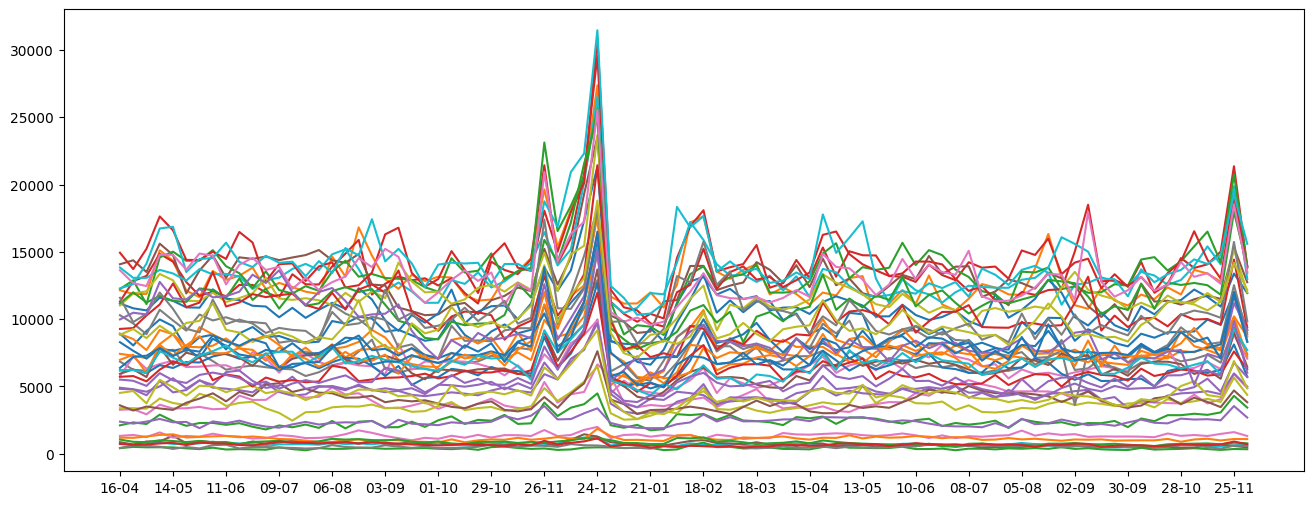

In [47]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

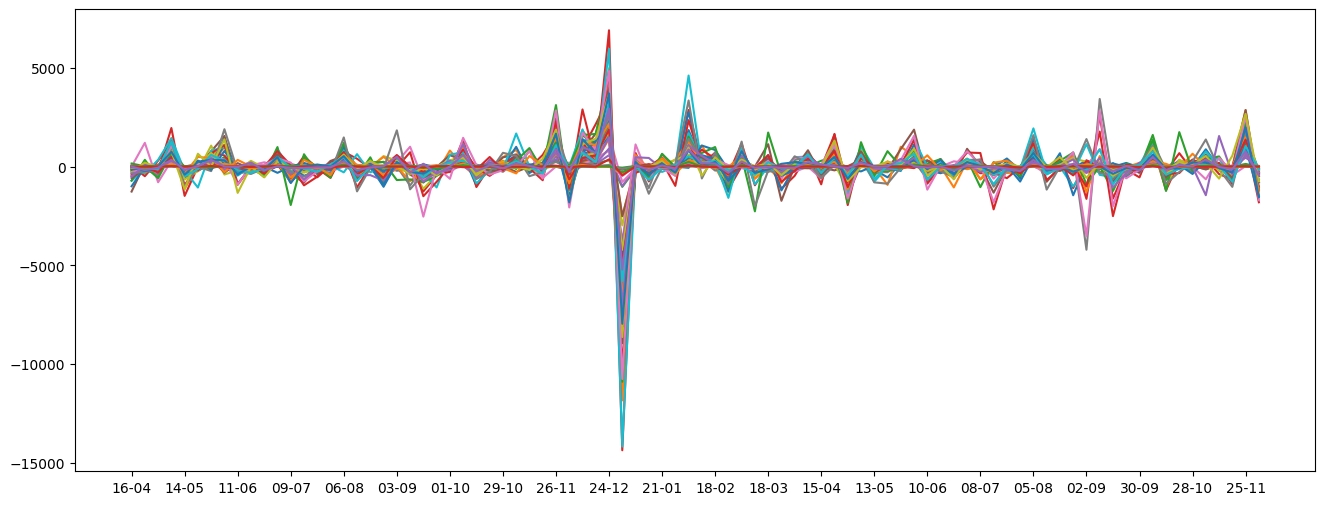

In [48]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

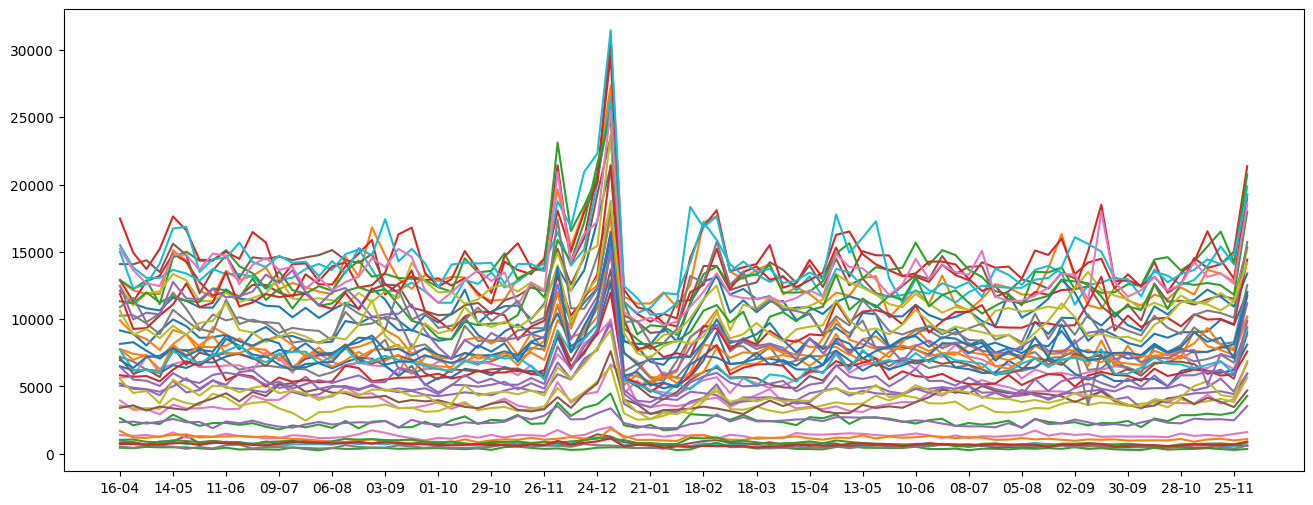

In [49]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

We now known that the weeks of Thanksgiving Day and Christmas are extreme for sales for walmart

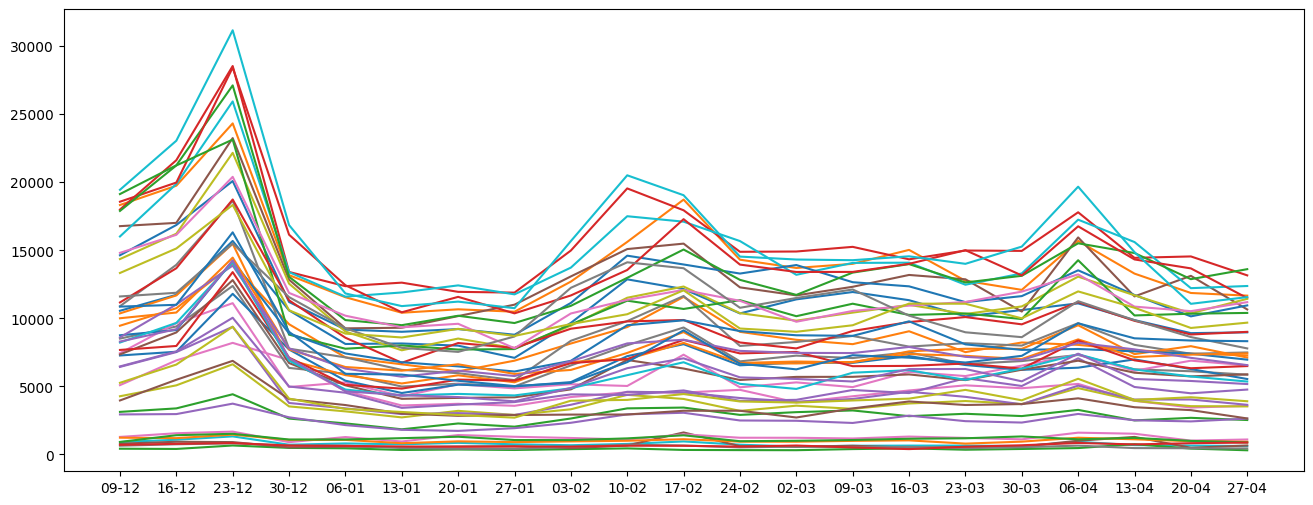

In [50]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

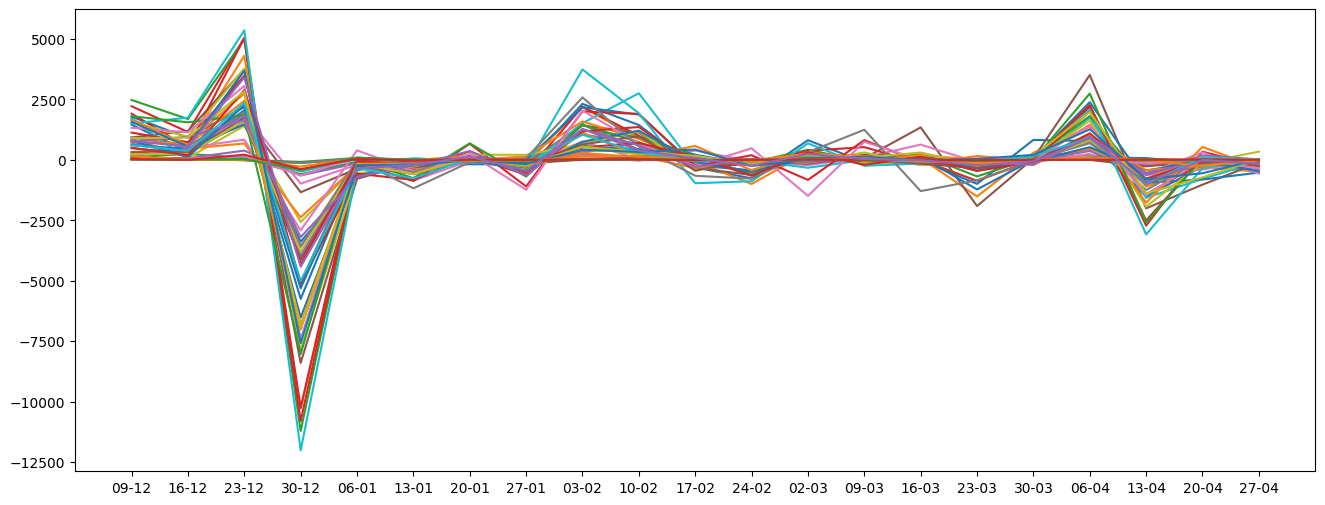

In [51]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

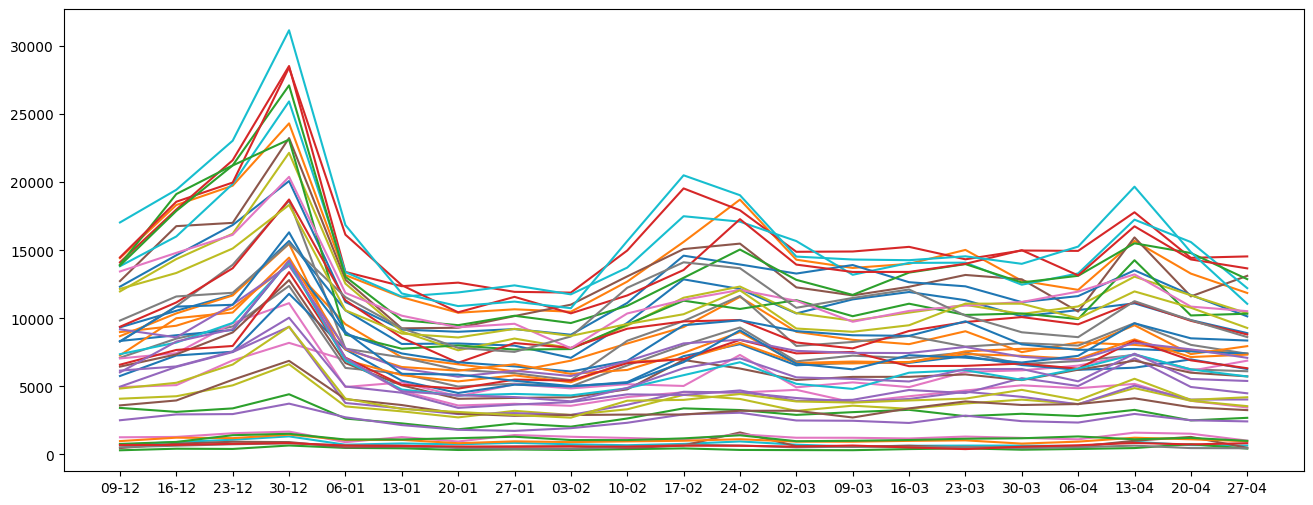

In [52]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

other

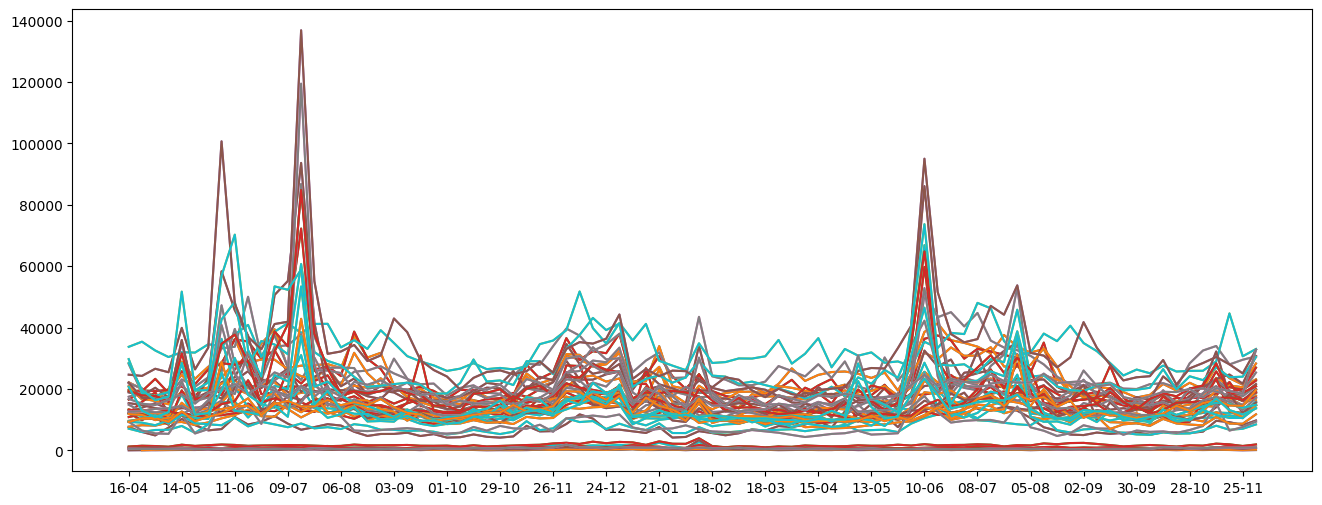

In [53]:
DEPT = 11

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[(view_df["Store"] == store) & (view_df["Dept"] == DEPT)]

    labels = store_view_df["Date"].apply(date_show)
    x = store_view_df["DN"]
    y = store_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

    plt.plot(x, y)

plt.show()

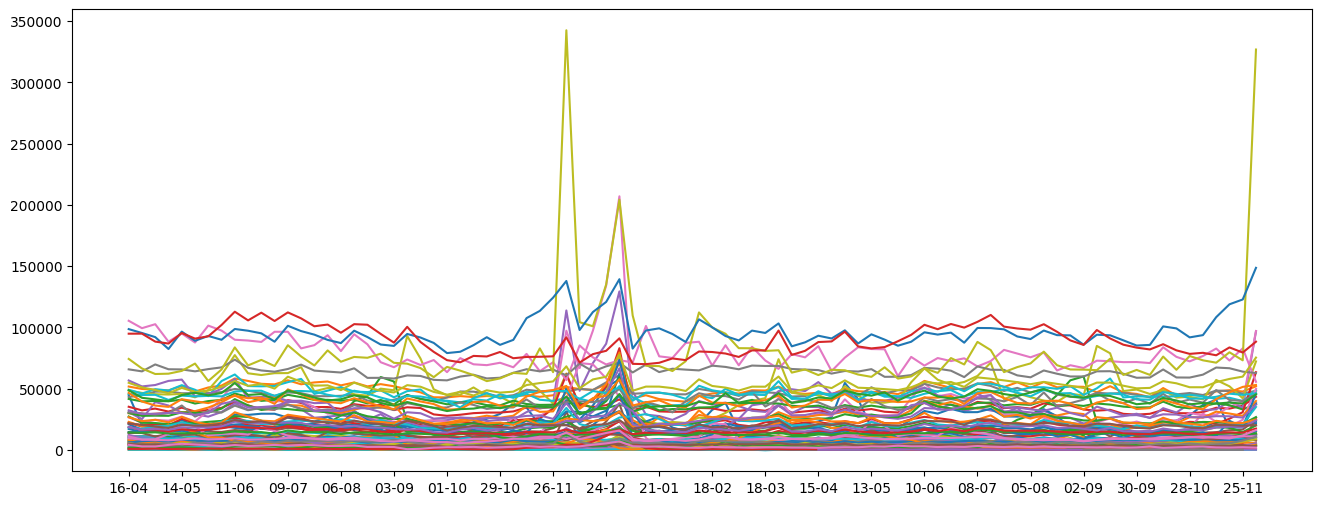

In [54]:
STORE = 6

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for dept in view_df["Dept"].sort_values().unique():
    dept_view_df = view_df[(view_df["Store"] == STORE) & (view_df["Dept"] == dept)]

    labels = dept_view_df["Date"].apply(date_show)
    x = dept_view_df["DN"]
    y = dept_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

plt.show()

adding year as sin and cos

In [55]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

train_df['Year-Sin'] = np.sin(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
train_df['Year-Cos'] = np.cos(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

test_df['Year-Sin'] = np.sin(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
test_df['Year-Cos'] = np.cos(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

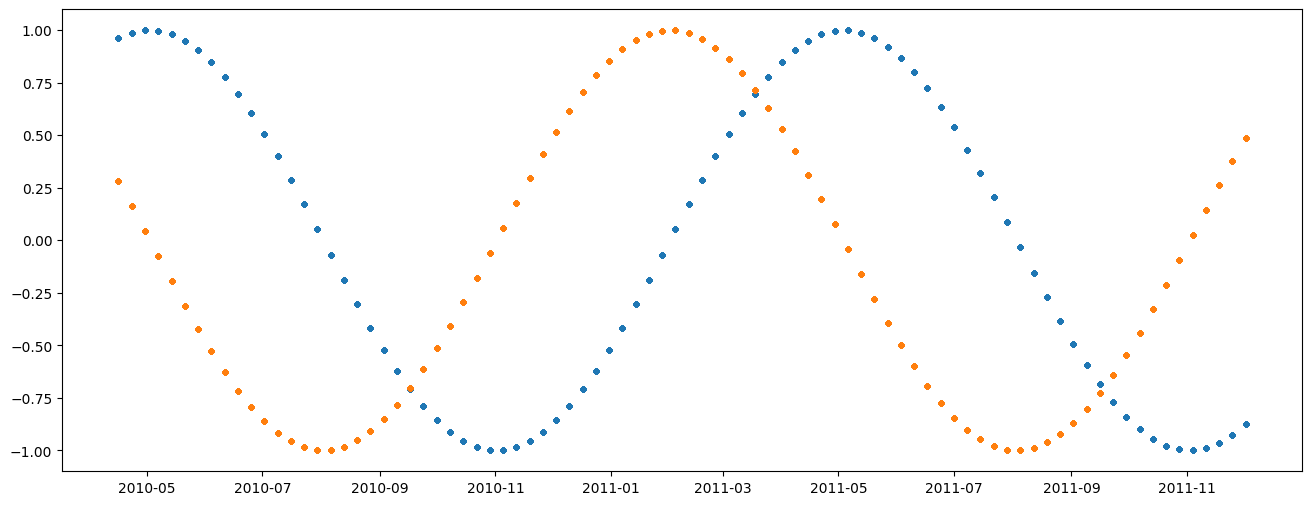

In [56]:
plt.figure(figsize=(16, 6))

plt.plot(train_df["Date"], train_df["Year-Sin"], '.')
plt.plot(train_df["Date"], train_df["Year-Cos"], '.')

plt.show()

## Model LinearRegression

In [57]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [58]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

<ipython-input-58-743699795622>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-58-743699795622>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-58-743699795622>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [59]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [60]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-1-weeks',
       ...
       'Dept-93', 'Dept-94', 'Dept-95', 'Dept-96', 'Dept-97', 'Dept-98',
       'Dept-99', 'Dept-50', 'Dept-78', 'Dept-65'],
      dtype='object', length=142)

In [61]:
train_1_df.columns.size, test_1_df.columns.size

(142, 142)

In [62]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [63]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [64]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


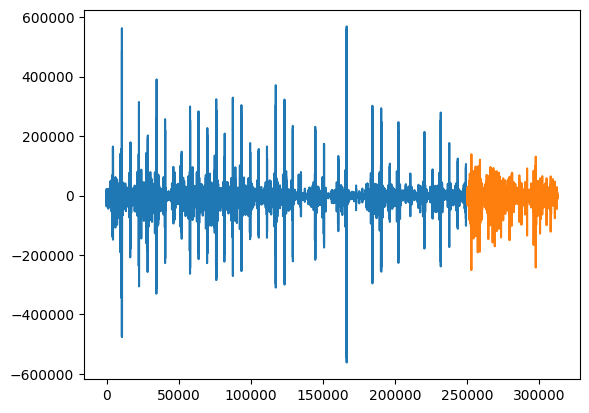

In [65]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [66]:
y_train.min(), y_test.min()

(-561345.54, -250560.69)

In [67]:
y_train.describe()

count    250289.000000
mean          8.252600
std        8246.597466
min     -561345.540000
25%        -630.130000
50%           1.530000
75%         670.340000
max      568347.700000
Name: Weekly-Diff, dtype: float64

In [68]:
mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [69]:
y_train.describe()

count    2.502890e+05
mean    -9.119932e-19
std      1.000000e+00
min     -6.807096e+01
25%     -7.741164e-02
50%     -8.151968e-04
75%      8.028613e-02
max      6.891805e+01
Name: Weekly-Diff, dtype: float64

In [70]:
x_train.describe()

index          Date    Temperature     Fuel_Price  \
count  250289.000000  2.502890e+05  250289.000000  250289.000000   
mean   156205.058488  1.297193e+18      61.585433       3.257915   
std     90216.451196  1.499528e+16      18.457818       0.440627   
min         0.000000  1.271376e+18      -2.060000       2.513000   
25%     78117.000000  1.284077e+18      48.720000       2.841000   
50%    156184.000000  1.297382e+18      64.190000       3.232000   
75%    234323.000000  1.310083e+18      75.320000       3.638000   
max    312504.000000  1.322784e+18     100.140000       4.211000   

                 CPI   Unemployment      IsHoliday     Store-Type  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean      169.560455       8.216114       0.070263       1.586522   
std        38.424753       1.873331       0.255590       0.664023   
min       126.064000       4.420000       0.000000       1.000000   
25%       132.364839       7.274000       0.000000       1.000000   
50%       182.380600       8.021000       0.000000       1.000000   
75%       211.169023       8.625000       0.000000       2.000000   
max       222.397544      14.313000       1.000000       3.000000   

         Store-Size  Weekly-Sales-last-1-weeks  ...        Dept-93  \
count  2.502890e+05              250289.000000  ...  250289.000000   
mean   7.903467e-17               16084.005536  ...       0.014052   
std    1.000000e+00               22799.863091  ...       0.117705   
min   -1.680818e+00               -4988.940000  ...       0.000000   
25%   -7.148066e-01                2228.900000  ...       0.000000   
50%    5.008847e-02                7783.090000  ...       0.000000   
75%    1.074869e+00               20349.200000  ...       0.000000   
max    1.356257e+00              693099.360000  ...       1.000000   

             Dept-94        Dept-95        Dept-96        Dept-97  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013037       0.015462       0.011255       0.015027   
std         0.113433       0.123382       0.105491       0.121659   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-98        Dept-99        Dept-50        Dept-78  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013596       0.000212       0.003676       0.000008   
std         0.115808       0.014550       0.060517       0.002827   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-65  
count  250289.000000  
mean        0.000344  
std         0.018533  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 141 columns]

In [71]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_size = x_train[column].mean()
        x_std_size = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_size) / x_std_size
        x_test[column] = (x_test[column] - x_mean_size) / x_std_size

In [72]:
x_train.describe()

index          Date   Temperature    Fuel_Price           CPI  \
count  2.502890e+05  2.502890e+05  2.502890e+05  2.502890e+05  2.502890e+05   
mean   3.197725e-16 -1.134153e-14  1.816889e-17  9.447823e-17  1.453511e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.731448e+00 -1.721644e+00 -3.448156e+00 -1.690582e+00 -1.131990e+00   
25%   -8.655634e-01 -8.746572e-01 -6.970181e-01 -9.461875e-01 -9.680118e-01   
50%   -2.334218e-04  1.266225e-02  1.411091e-01 -5.881479e-02  3.336429e-01   
75%    8.658946e-01  8.596490e-01  7.441057e-01  8.626003e-01  1.082858e+00   
max    1.732488e+00  1.706636e+00  2.088793e+00  2.163021e+00  1.375079e+00   

       Unemployment      IsHoliday    Store-Type    Store-Size  \
count  2.502890e+05  250289.000000  2.502890e+05  2.502890e+05   
mean  -2.979698e-16       0.070263  2.325618e-16  3.224978e-17   
std    1.000000e+00       0.255590  1.000000e+00  1.000000e+00   
min   -2.026398e+00       0.000000 -8.832858e-01 -1.680818e+00   
25%   -5.029085e-01       0.000000 -8.832858e-01 -7.148066e-01   
50%   -1.041535e-01       0.000000 -8.832858e-01  5.008847e-02   
75%    2.182669e-01       0.000000  6.226864e-01  1.074869e+00   
max    3.254570e+00       1.000000  2.128659e+00  1.356257e+00   

       Weekly-Sales-last-1-weeks  ...        Dept-93        Dept-94  \
count               2.502890e+05  ...  250289.000000  250289.000000   
mean               -4.542223e-18  ...       0.014052       0.013037   
std                 1.000000e+00  ...       0.117705       0.113433   
min                -9.242575e-01  ...       0.000000       0.000000   
25%                -6.076837e-01  ...       0.000000       0.000000   
50%                -3.640774e-01  ...       0.000000       0.000000   
75%                 1.870711e-01  ...       0.000000       0.000000   
max                 2.969383e+01  ...       1.000000       1.000000   

             Dept-95        Dept-96        Dept-97        Dept-98  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.015462       0.011255       0.015027       0.013596   
std         0.123382       0.105491       0.121659       0.115808   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-99        Dept-50        Dept-78        Dept-65  
count  250289.000000  250289.000000  250289.000000  250289.000000  
mean        0.000212       0.003676       0.000008       0.000344  
std         0.014550       0.060517       0.002827       0.018533  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 141 columns]

In [73]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [74]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([250289, 141]),
 torch.Size([250289]),
 torch.Size([62240, 141]),
 torch.Size([62240]))

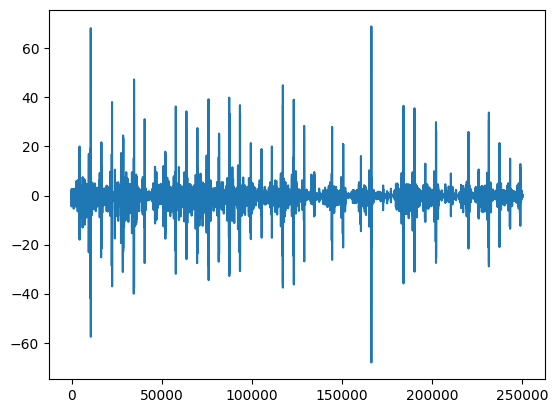

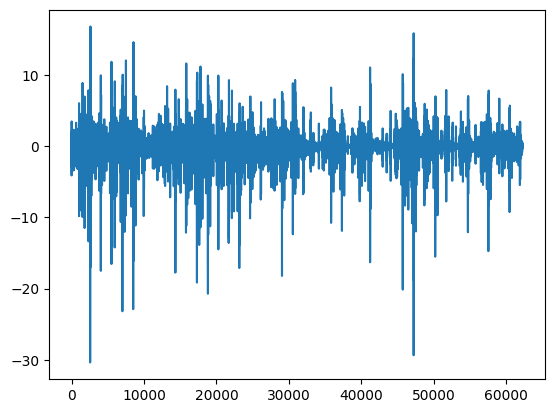

In [75]:
plt.plot(range(len(y_train)), y_train)
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.show()

In [76]:
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize: int):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


def train_model_1(x_train, y_train, model, criterion, num_epochs, batch_size):
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    losses = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        losses.append(running_loss / len(train_loader))

        if epoch % int(num_epochs / 10) == 0:
            print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses



linear_regression_model = LinearRegression(x_train.shape[1])
criterion = torch.nn.MSELoss()

batch_size = 128

losses = train_model_1(x_train, y_train, linear_regression_model, criterion, 30, batch_size)

<ipython-input-76-a679b6caf16f>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [0], Running Loss: 1960.5594
Epoch [3], Running Loss: 1955.8116
Epoch [6], Running Loss: 1956.3968
Epoch [9], Running Loss: 1955.7700
Epoch [12], Running Loss: 1955.6125
Epoch [15], Running Loss: 1955.7373
Epoch [18], Running Loss: 1955.5941
Epoch [21], Running Loss: 1956.4481
Epoch [24], Running Loss: 1955.6362
Epoch [27], Running Loss: 1955.6717


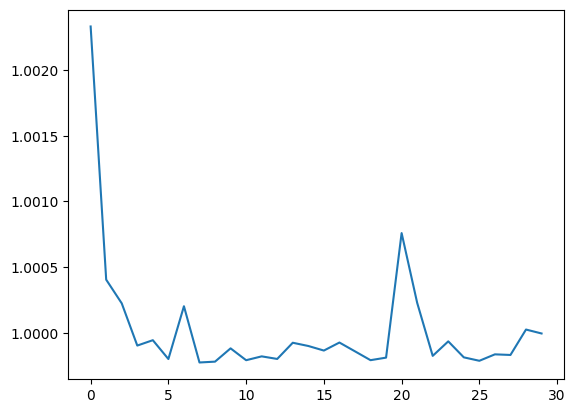

In [77]:
plt.plot(losses)

In [78]:
test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

running_loss = 0

results_target = []
results_output = []

for batch in test_loader:
    inputs, targets = batch

    outputs = linear_regression_model(inputs)
    loss = criterion(outputs, targets)

    results_target += targets.detach().numpy().tolist()
    results_output += outputs.detach().numpy().tolist()

    running_loss += loss.item()

    print(f'Loss: {loss.item():.4f}')

target_loss = running_loss / len(test_loader)

print(f'Target: {target_loss:.4f} Running Loss: {running_loss:.4f}')

<ipython-input-78-7eaa16b66b07>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


Loss: 0.4478
Loss: 0.8186
Loss: 0.4595
Loss: 0.4196
Loss: 0.5749
Loss: 0.2770
Loss: 0.3712
Loss: 0.1677
Loss: 0.3501
Loss: 0.7215
Loss: 0.5430
Loss: 0.1603
Loss: 0.3034
Loss: 0.5377
Loss: 0.3283
Loss: 0.2714
Loss: 1.0681
Loss: 0.3076
Loss: 0.6710
Loss: 0.5630
Loss: 0.3914
Loss: 0.2701
Loss: 0.5647
Loss: 0.9060
Loss: 0.9556
Loss: 1.0350
Loss: 0.2299
Loss: 0.3041
Loss: 1.1069
Loss: 2.8364
Loss: 1.2526
Loss: 1.4750
Loss: 0.6629
Loss: 0.1999
Loss: 0.4853
Loss: 0.2280
Loss: 0.4646
Loss: 0.2838
Loss: 0.4715
Loss: 0.3078
Loss: 4.9699
Loss: 0.2786
Loss: 0.5543
Loss: 0.4826
Loss: 0.7755
Loss: 0.3249
Loss: 1.0697
Loss: 0.4317
Loss: 0.1377
Loss: 0.3654
Loss: 1.0673
Loss: 0.2909
Loss: 0.9761
Loss: 0.4944
Loss: 4.9854
Loss: 0.5444
Loss: 0.3526
Loss: 0.3932
Loss: 0.3054
Loss: 0.9205
Loss: 0.4828
Loss: 0.1261
Loss: 0.4951
Loss: 2.1020
Loss: 0.4411
Loss: 0.5280
Loss: 0.2998
Loss: 0.1689
Loss: 0.2605
Loss: 0.2025
Loss: 5.0723
Loss: 0.5317
Loss: 0.3725
Loss: 0.4180
Loss: 0.6851
Loss: 0.3255
Loss: 0.3797

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [79]:
results_output_view = [((x[0] * std_norm) + mean_norm) for x in results_output]

In [80]:
results_target_view = [((x * std_norm) + mean_norm) for x in results_target]

In [81]:
len(results_output_view), len(results_target_view)

(62240, 62240)

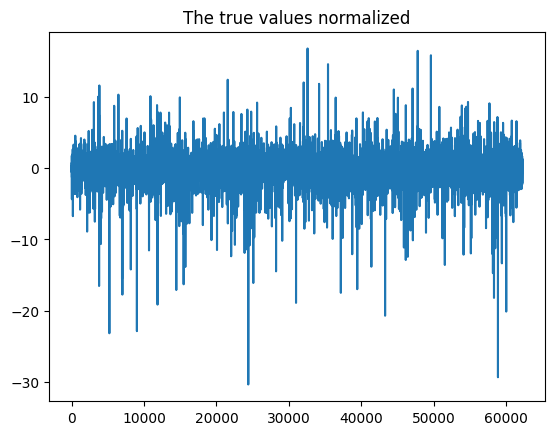

In [82]:
plt.title('The true values normalized')
plt.plot(range(len(results_target)), results_target)

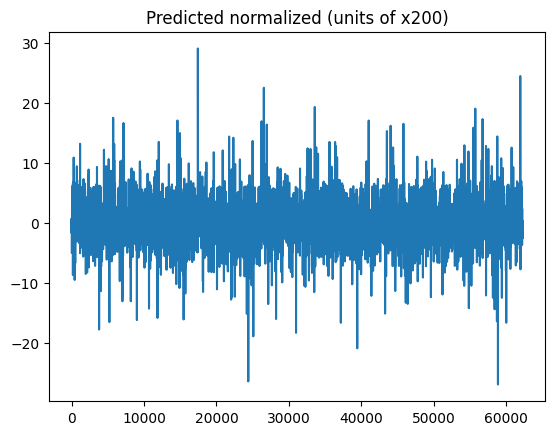

In [83]:
plt.title('Predicted normalized (units of x200)')
plt.plot(range(len(results_output)), [x[0] * 200 for x in results_output])

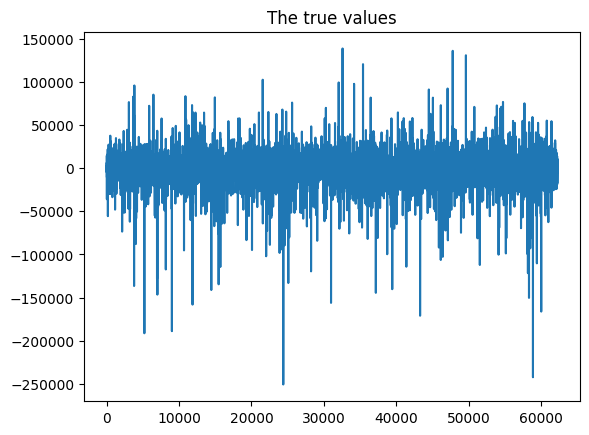

In [84]:
plt.title('The true values')
plt.plot(range(len(results_target_view)), results_target_view)

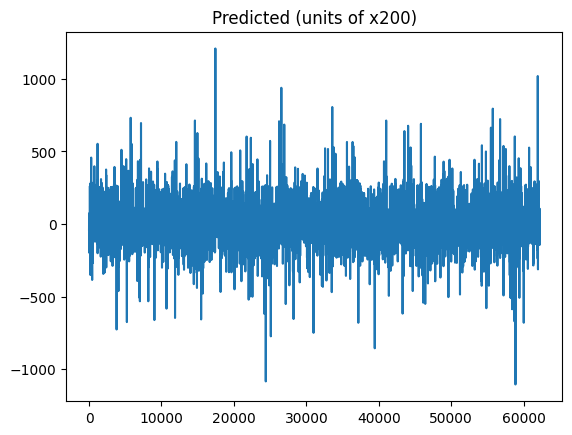

In [85]:
plt.title('Predicted (units of x200)')
plt.plot(range(len(results_output_view)), results_output_view)

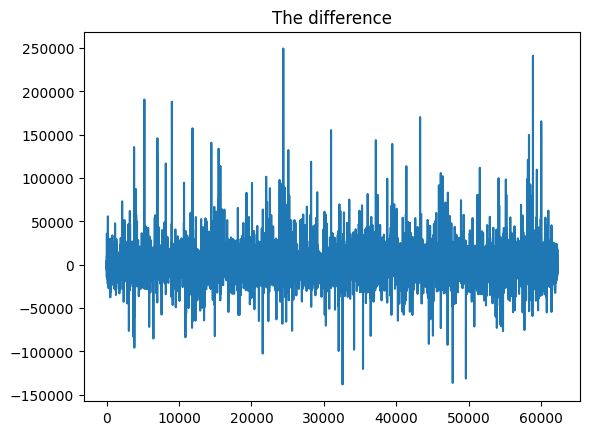

In [86]:
plt.title('The difference')
plt.plot(range(len(results_output_view)), [results_output_view[i] - results_target_view[i] for i in range(len(results_output_view))])

## LSTM Model

In [126]:
df = original_df.copy()

In [127]:
for store in df["Store"].unique():
    df["Store-" + str(store)] = (df["Store"] == store).map({True: 1, False: 0})

for dept in df["Dept"].unique():
    df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})

<ipython-input-127-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-127-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-127-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [128]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


In [129]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

<ipython-input-129-d96e69321d5b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["IsHoliday"] = df["IsHoliday_x"]


In [130]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

<ipython-input-130-d82d56fffdc2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Type"] = df["Type"]
<ipython-input-130-d82d56fffdc2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Size"] = df["Size"]


In [131]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [132]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

<ipython-input-132-cc26cbe55b12>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["index-2"] = df.index
<ipython-input-132-cc26cbe55b12>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)


In [133]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [134]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [135]:
df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)
df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)
df  = df.dropna()

<ipython-input-135-6ddc439288dd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)


In [136]:
df = df.drop(columns=["Weekly_Sales"])

In [137]:
df["Date"] = df["Date"].apply(lambda x: x.value)

In [138]:
df["Date"]

index-2
73       1265932800000000000
145      1266537600000000000
218      1267142400000000000
290      1267747200000000000
363      1268352000000000000
                ...         
84701    1323993600000000000
84767    1324598400000000000
84895    1325808000000000000
85083    1327622400000000000
86086    1337299200000000000
Name: Date, Length: 418239, dtype: int64

In [139]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

df['Year-Sin'] = np.sin(df["Date"] * (2 * np.pi / YEAR))
df['Year-Cos'] = np.cos(df["Date"] * (2 * np.pi / YEAR))

In [140]:
df=df.drop(columns=["Store","Dept","Store-Type","Store-Size",])
for column in df.columns:
  print(column)

Date
Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95


In [141]:
for column in df.columns:
  if(column!= "Store-Dept"):
    df[column] =df[column].astype(float)


In [142]:
lookback= 5
lookback_df=pd.DataFrame(df["Weekly-Diff"])
for i in range(lookback):
  for column in df.columns:
      lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
lookback_df.describe()

<ipython-input-142-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-142-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-142-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Weekly-Diff    t( 1) Date  t( 1) Temperature  t( 1) Fuel_Price  \
count  418239.000000  4.182380e+05      418238.000000     418238.000000   
mean      -10.132176  1.308708e+18          60.285821          3.365862   
std      7206.831512  2.478287e+16          18.344008          0.456672   
min   -561345.540000  1.265933e+18          -2.060000          2.472000   
25%      -624.515000  1.287101e+18          47.090000          2.938000   
50%         1.290000  1.308874e+18          62.300000          3.461000   
75%       664.820000  1.330042e+18          74.370000          3.739000   
max    568347.700000  1.351210e+18         100.140000          4.468000   

           t( 1) CPI  t( 1) Unemployment  t( 1) Store-1  t( 1) Store-2  \
count  418238.000000       418238.000000  418238.000000  418238.000000   
mean      171.229769            7.955587       0.024307       0.024292   
std        39.165474            1.863359       0.154000       0.153956   
min       126.064000            3.879000       0.000000       0.000000   
25%       132.064433            6.891000       0.000000       0.000000   
50%       182.350989            7.866000       0.000000       0.000000   
75%       212.566881            8.567000       0.000000       0.000000   
max       227.232807           14.313000       1.000000       1.000000   

       t( 1) Store-3  t( 1) Store-4  ...  t( 5) Dept-99  t( 5) Dept-77  \
count  418238.000000  418238.000000  ...  418234.000000  418234.000000   
mean        0.021433       0.024374  ...       0.001973       0.000270   
std         0.144822       0.154207  ...       0.044370       0.016435   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

       t( 5) Dept-39  t( 5) Dept-50  t( 5) Dept-43  t( 5) Dept-65  \
count  418234.000000  418234.000000  418234.000000  418234.000000   
mean        0.000026       0.003701       0.000017       0.000340   
std         0.005128       0.060726       0.004091       0.018423   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       t( 5) IsHoliday  t( 5) Weekly-Diff  t( 5) Year-Sin  t( 5) Year-Cos  
count    418234.000000      418234.000000   418234.000000   418234.000000  
mean          0.070712         -10.123017        0.061025       -0.064965  
std           0.256343        7206.714596        0.706329        0.702251  
min           0.000000     -561345.540000       -0.999668       -1.000000  
25%           0.000000        -624.507500       -0.647161       -0.751132  
50%           0.000000           1.295000        0.136906       -0.128398  
75%           0.000000         664.815000        0.756771        0.627317  
max           1.000000      568347.700000        0.999963        0.999853  

[8 rows x 676 columns]

In [143]:
for column in lookback_df.columns:
    print(column)

Weekly-Diff
t( 1) Date
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1

In [144]:
# prompt: rename "Weekly-Diff" to "t( 0) Weekly-Diff"

lookback_df = lookback_df.rename(columns={"Weekly-Diff": "t( 0) Weekly-Diff"})
lookback_df["t( 0) Store-Dept"]= df["Store-Dept"]

In [145]:
# prompt: check if lookback_df has nulls and how many in each column

null_counts = lookback_df.isnull().sum()
for column, null_count in null_counts.items():
    print(f"Column: {column}, Null count: {null_count}")


Column: t( 0) Weekly-Diff, Null count: 0
Column: t( 1) Date, Null count: 1
Column: t( 1) Temperature, Null count: 1
Column: t( 1) Fuel_Price, Null count: 1
Column: t( 1) CPI, Null count: 1
Column: t( 1) Unemployment, Null count: 1
Column: t( 1) Store-1, Null count: 1
Column: t( 1) Store-2, Null count: 1
Column: t( 1) Store-3, Null count: 1
Column: t( 1) Store-4, Null count: 1
Column: t( 1) Store-5, Null count: 1
Column: t( 1) Store-6, Null count: 1
Column: t( 1) Store-7, Null count: 1
Column: t( 1) Store-8, Null count: 1
Column: t( 1) Store-9, Null count: 1
Column: t( 1) Store-10, Null count: 1
Column: t( 1) Store-11, Null count: 1
Column: t( 1) Store-12, Null count: 1
Column: t( 1) Store-13, Null count: 1
Column: t( 1) Store-14, Null count: 1
Column: t( 1) Store-15, Null count: 1
Column: t( 1) Store-16, Null count: 1
Column: t( 1) Store-17, Null count: 1
Column: t( 1) Store-18, Null count: 1
Column: t( 1) Store-19, Null count: 1
Column: t( 1) Store-20, Null count: 1
Column: t( 1) Stor

In [146]:
# prompt: drop all rows that have different values  in diifferent "t( i) Store-Dept" columns

lookback_df = lookback_df[lookback_df.apply(lambda row: all(row[f"t( {i+1}) Store-Dept"] == row["t( 0) Store-Dept"] for i in range(lookback)), axis=1)]
lookback_df = lookback_df.dropna()

In [147]:
lookback_df = lookback_df.drop(columns=[column for column in lookback_df.columns if "Store-Dept" in column])

In [148]:
lookback_df.head(5)["t( 2) Weekly-Diff"]

index-2
73    -22192.01
145     2424.36
218     -784.51
290     1093.25
363     4092.57
Name: t( 2) Weekly-Diff, dtype: float64

In [149]:
# prompt: split into train validation  and test based on "t( 5) Date" using 0.8 ratio

sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()
lookback_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()

lookback_df = lookback_df.reset_index()
sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()
val_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()

train_df = train_df.reset_index()
val_df = val_df.reset_index()


In [150]:
# prompt: drop all columns not starting with t in train_df val_df and final_test_df

train_df = train_df.drop(columns=[column for column in train_df.columns if not column.startswith("t")])
val_df = val_df.drop(columns=[column for column in val_df.columns if not column.startswith("t")])
final_test_df = final_test_df.drop(columns=[column for column in final_test_df.columns if not column.startswith("t")])


In [151]:
def drop_unneeded_columns(table):
   return table.drop(columns= [column for column in train_df.columns if ("Date" in column) ])


In [152]:
# prompt: apply  drop_unneeded_columns on train val and test

train_df =drop_unneeded_columns(train_df)
val_df = drop_unneeded_columns(val_df)
final_test_df = drop_unneeded_columns(final_test_df)


In [153]:
columns_per_row = [column for column in df.columns if "t( 1) "+column in train_df.columns]
columns_per_row.remove("Weekly-Diff")

In [154]:
for column in columns_per_row:
    print(column)

Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95
Dept-

In [155]:
len(columns_per_row)

133

In [156]:
for column in train_df.columns:
    print(column)

t( 0) Weekly-Diff
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1) Dep

In [171]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")

  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_mean_size = local_train_df[column].mean()
          x_std_size = local_train_df[column].std()

          local_train_df[column] = (local_train_df[column] - x_mean_size) / x_std_size
          local_val_df[column] = (local_val_df[column] - x_mean_size) / x_std_size
          local_test_df[column] = (local_test_df[column] - x_mean_size) / x_std_size

def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  mean_norm = local_train_df[test_col ].mean()
  std_norm = local_train_df[test_col ].std()

  local_train_df[test_col] = (local_train_df[test_col] - x_mean_size) / x_std_size
  local_train_df[test_col] = (local_train_df[test_col] - x_mean_size) / x_std_size
  local_train_df[test_col] = (local_train_df[test_col] - x_mean_size) / x_std_size

In [172]:
def get_data_for_model(local_lookback, table):
  x = np.zeros((len(table), local_lookback, len(columns_per_row)+1))
  y = np.zeros((len(table), 1, local_lookback))
  for i in range(local_lookback):
    x[:,i,0] = table['t( '+str(i)+') Weekly-Diff']
    for j ,column in enumerate(columns_per_row):
      x[:,i,j+1]= table["t( "+str(i+1)+") "+column]
  for i in range(local_lookback):
    y[:,0,i]= table["t( "+str(i+1)+") Weekly-Diff"]
  return x, y

In [173]:
def create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_train_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_train, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y_train, dtype=torch.float32).to(local_device))
  local_train_loader = torch.utils.data.DataLoader(local_train_dataset, batch_size=local_batch_size, shuffle=True)

  local_val_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_val, dtype=torch.float32).to(local_device),
                                                     torch.tensor(local_y_val, dtype=torch.float32).to(local_device))
  local_val_loader = torch.utils.data.DataLoader(local_val_dataset, batch_size=local_batch_size, shuffle=True)

  local_test_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_test, dtype=torch.float32).to(local_device),
                                                      torch.tensor(local_y_test, dtype=torch.float32).to(local_device))
  local_test_loader = torch.utils.data.DataLoader(local_test_dataset, batch_size=local_batch_size, shuffle=True)

  return local_batch_size, local_device, local_train_dataset, local_train_loader, local_val_dataset, local_val_loader, local_test_dataset, local_test_loader

In [182]:
def get_final_data_for_model(local_lookback, train_df, val_df, test_df):
  local_train_df = train_df.copy()
  local_val_df = val_df.copy()
  local_test_df = test_df.copy()

  normalize_x(local_lookback, local_train_df, local_val_df, local_test_df)
  normalize_y(local_lookback, local_train_df, local_val_df, local_test_df)

  local_x_train, local_y_train = get_data_for_model(local_lookback, local_train_df)
  local_x_val, local_y_val = get_data_for_model(local_lookback, local_val_df)
  local_x_test, local_y_test = get_data_for_model(local_lookback, local_test_df)

  return create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test)

In [175]:
class LSTMModel(torch.nn.Module):
    def __init__(self,input_size,num_layers):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=50, num_layers=num_layers)
        self.linear = torch.nn.Linear(50, num_layers)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


def train_lstm_model(model, num_epochs,train_loader,test_loader):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = torch.nn.MSELoss().to(device)
    list_test_rmse= []
    list_train_rmse = []
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
              running_loss = 0
              for X_batch, y_batch in train_loader:
                y_pred = model(X_batch)
                train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += train_rmse
              train_rmse = running_loss/len(train_loader)

              running_loss = 0
              for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += test_rmse
              test_rmse = running_loss/len(test_loader)
            list_test_rmse.append(test_rmse)
            list_train_rmse.append(train_rmse)
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    return list_test_rmse, list_train_rmse

In [183]:
print("Get the data for the Model")

batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

print("Create the Model")

model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

print("Training the Model")

test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

Get the data for the Model
Create the Model
Training the Model


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1, 5])) that is different to the input size (torch.Size([32, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 1, 5])) that is different to the input size (torch.Size([9, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([17, 1, 5])) that is different to the input size (torch.Size([17, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
 

Epoch 0: train RMSE 331.6443, test RMSE 3108.6475
Epoch 10: train RMSE 329.4451, test RMSE 3118.5220
Epoch 20: train RMSE 327.2772, test RMSE 3105.0310


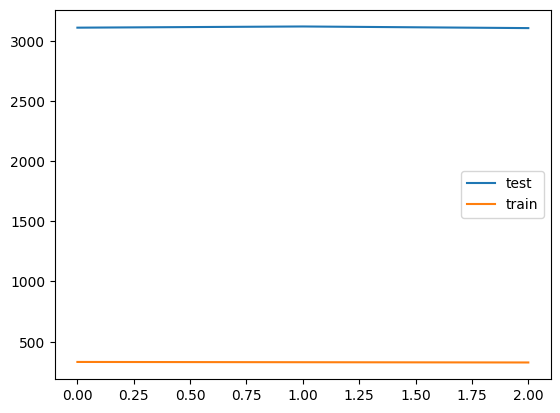

In [184]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [185]:
x_train[0,1,2]

-1.4497888167394324

In [164]:
for X_batch, y_batch in train_loader:
  print(y_batch)
  break

tensor([[[-6.0149e-03, -7.5722e-05, -8.0543e-04, -7.4696e-04, -1.4778e+00]],

        [[ 4.0480e-01, -8.8810e-02, -1.3537e-01,  2.8208e-01, -1.2656e+03]],

        [[ 2.8624e-02,  2.0589e-02, -7.6338e-02,  6.6218e-02, -7.8802e+01]],

        [[-7.1823e-02,  1.2940e-01, -2.3390e-01, -1.3135e-02,  1.8715e+01]],

        [[-5.6460e-02, -1.2646e-01,  1.3696e-01, -2.4846e-02,  4.8684e+01]],

        [[ 7.2399e-01, -1.0916e+00,  1.1618e+00,  7.3064e-01,  6.5691e+02]],

        [[ 1.8536e-03, -1.0698e-03, -1.7579e-03,  2.5036e-04, -8.9018e+00]],

        [[-1.3139e-01,  7.7095e-01, -1.2073e+00,  1.9369e-02,  3.6322e+03]],

        [[ 2.2770e-01, -4.5557e-01,  2.5418e-01, -2.6897e-01,  1.1352e+03]],

        [[ 7.3280e-02,  8.2393e-03, -1.3169e-02,  5.5062e-03, -1.3274e+02]],

        [[ 3.8560e-02,  5.2165e-03, -5.8141e-02, -1.8249e-02,  3.8831e+00]],

        [[-8.1364e-02,  5.5527e-03,  1.7987e-02,  3.9883e-02,  9.8069e+02]],

        [[-6.4637e-01,  6.0209e-02,  4.3365e-02,  1.0306e-01, -5

In [186]:
def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_mean_norm = local_train_df[test_col].mean()
  y_std_norm = local_train_df[test_col].std()

  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm

In [187]:
print("Get the data for the Model")

batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

print("Create the Model")

model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

print("Training the Model")

test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

Get the data for the Model
Create the Model
Training the Model


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1, 5])) that is different to the input size (torch.Size([32, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 1, 5])) that is different to the input size (torch.Size([9, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([17, 1, 5])) that is different to the input size (torch.Size([17, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
 

Epoch 0: train RMSE 0.6549, test RMSE 3099.2842
Epoch 10: train RMSE 0.6496, test RMSE 3119.7525
Epoch 20: train RMSE 0.6479, test RMSE 3113.7038


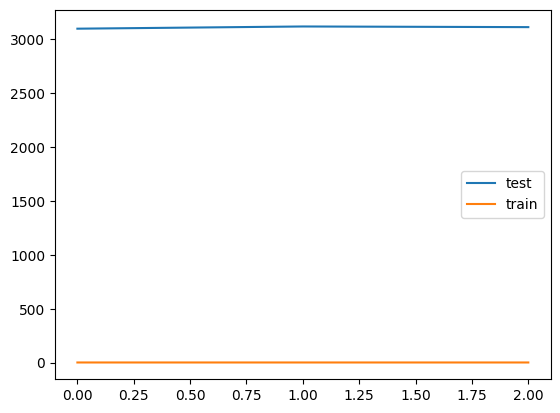

In [188]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [192]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")

  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_min = local_train_df[column].min()
          x_max = local_train_df[column].max()

          local_train_df[column] = (local_train_df[column] - x_min) / (x_max - x_min)
          local_val_df[column] = (local_val_df[column] - x_min) / (x_max - x_min)
          local_test_df[column] = (local_test_df[column] - x_min) / (x_max - x_min)


def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_min = local_train_df[test_col].min()
  y_max = local_train_df[test_col].max()

  local_train_df[test_col] = (local_train_df[test_col] - y_min) / (y_max - y_min)
  local_train_df[test_col] = (local_train_df[test_col] - y_min) / (y_max - y_min)
  local_train_df[test_col] = (local_train_df[test_col] - y_min) / (y_max - y_min)

In [202]:
class LSTMModel(torch.nn.Module):
  def __init__(self,device, input_size, num_layers):
    super().__init__()
    self.device = device
    self.input_size = input_size
    self.hidden_size = 50
    self.num_layers = num_layers
    self.lstm = torch.nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first=True).to(self.device)
    self.output_layer = torch.nn.Linear(self.hidden_size, 1).to(self.device)

  def forward(self, x):
    hidden_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    cell_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    out, _ = self.lstm(x, (hidden_states, cell_states))
    out = self.output_layer(out[:, -1, :])
    return out


def train_lstm_model(model, num_epochs, train_loader, test_loader):
  optimizer = torch.optim.Adam(model.parameters())
  loss_fn = torch.nn.MSELoss().to(device)
  list_test_rmse= []
  list_train_rmse = []
  for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
      y_pred = model(X_batch)
      loss = loss_fn(y_pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
      running_loss = 0
      for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
        running_loss += train_rmse
      train_rmse = running_loss/len(train_loader)

      running_loss = 0
      for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
        running_loss += test_rmse

      test_rmse = running_loss/len(test_loader)

      list_test_rmse.append(test_rmse)
      list_train_rmse.append(train_rmse)
      print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

  return list_test_rmse, list_train_rmse

In [197]:
batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

In [203]:
model = LSTMModel(device=device, input_size=x_train.shape[2], num_layers=lookback).to(device)

test_rmse , train_rmse = train_lstm_model(model, num_epochs=5, train_loader=train_loader, test_loader=val_loader)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 1, 5])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([17, 1, 5])) that is different to the input size (torch.Size([17, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: train RMSE 0.0040, test RMSE 3128.4620
Epoch 1: train RMSE 0.0043, test RMSE 3114.3419
Epoch 3: train RMSE 0.0041, test RMSE 3099.5292
Epoch 4: train RMSE 0.0040, test RMSE 3121.2239


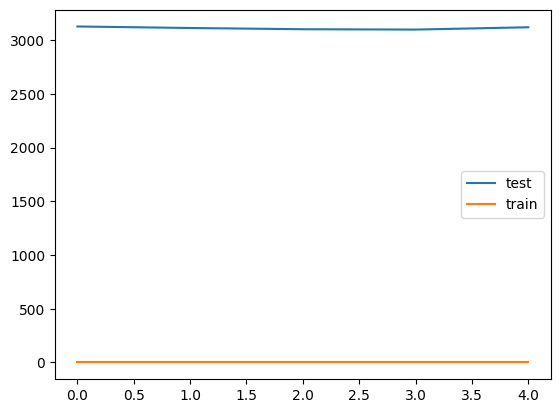

In [204]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()